In [1]:
Nx = 8; Ny = 10
using OffsetArrays
site_idx = range(1,Nx*Ny) 
lattice = reverse(OffsetArray(reshape(site_idx, (Ny,Nx)), 1:Ny, 1:Nx), dims=1)
coordinates = []
for x in 0:Nx-1
    for y in 0:Ny-1
        coordinates = [coordinates; x; y]
    end
end
coordinates = reshape(coordinates, (2, Nx*Ny)) |> transpose;

In [2]:
lattice

10×8 OffsetArray(::Matrix{Int64}, 1:10, 1:8) with eltype Int64 with indices 1:10×1:8:
 10  20  30  40  50  60  70  80
  9  19  29  39  49  59  69  79
  8  18  28  38  48  58  68  78
  7  17  27  37  47  57  67  77
  6  16  26  36  46  56  66  76
  5  15  25  35  45  55  65  75
  4  14  24  34  44  54  64  74
  3  13  23  33  43  53  63  73
  2  12  22  32  42  52  62  72
  1  11  21  31  41  51  61  71

In [3]:
function find_co(coordinates, p)
    x_co = coordinates[:,1]
    y_co = coordinates[:,2]
    x = hcat(x_co, y_co)[p, 1]
    y = hcat(x_co, y_co)[p, 2]
    return x, y
end
function distance(coordinates_p1, p1, coordinates_p2, p2)
    x2 = find_co(coordinates_p2, p2)[1]
    x1 = find_co(coordinates_p1, p1)[1]
    y2 = find_co(coordinates_p2, p2)[2]
    y1 = find_co(coordinates_p1, p1)[2]
    return sqrt( (x2 - x1)^2 + (y2 - y1)^2 )
end
distance(coordinates, 1, coordinates, 12)

1.4142135623730951

In [8]:
# GHOST POINTS
coordinates_top_left = hcat(coordinates[:,1].-Nx,coordinates[:,2].+Ny)
coordinates_top = hcat(coordinates[:,1],coordinates[:,2].+Ny)
coordinates_top_right = hcat(coordinates[:,1].+Nx,coordinates[:,2].+Ny)
coordinates_left = hcat(coordinates[:,1].-Nx,coordinates[:,2])
coordinates_right = hcat(coordinates[:,1].+Nx,coordinates[:,2])
coordinates_left = hcat(coordinates[:,1].-Nx,coordinates[:,2])
coordinates_right = hcat(coordinates[:,1].+Nx,coordinates[:,2])
coordinates_bottom_left = hcat(coordinates[:,1].-Nx,coordinates[:,2].-Ny)
coordinates_bottom = hcat(coordinates[:,1],coordinates[:,2].-Ny)
coordinates_bottom_right = hcat(coordinates[:,1].+Nx,coordinates[:,2].-Ny);

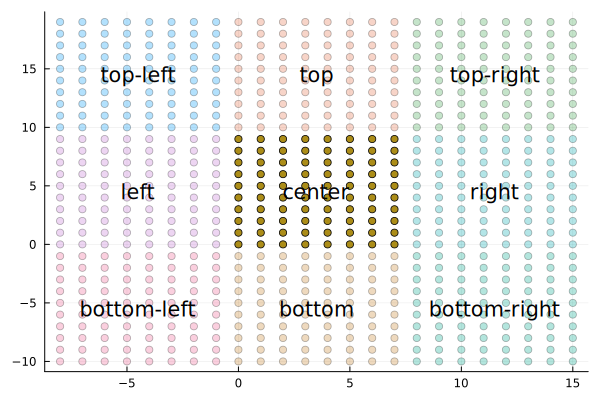

In [9]:
using Plots
center_x = (Nx-1)/2
center_y = (Ny-1)/2
scatter([coordinates_top_left[:,1]],[coordinates_top_left[:,2]],legend=false, alpha=0.3);annotate!( center_x-Nx, center_y+Ny, "top-left", :color)
scatter!([coordinates_top[:,1]],[coordinates_top[:,2]], alpha=0.3);annotate!(center_x, center_y+Ny, "top", :color)
scatter!([coordinates_top_right[:,1]],[coordinates_top_right[:,2]], alpha=0.3);annotate!(center_x+Nx, center_y+Ny, "top-right", :color)
scatter!([coordinates_left[:,1]],[coordinates_left[:,2]], alpha=0.3);annotate!(center_x-Nx, center_y, "left", :color)
scatter!([coordinates[:,1]], [coordinates[:,2]]);annotate!(center_x,center_y, "center", :color)
scatter!([coordinates_right[:,1]],[coordinates_right[:,2]], alpha=0.3);annotate!(center_x+Nx, center_y, "right", :color)
scatter!([coordinates_bottom_left[:,1]],[coordinates_bottom_left[:,2]], alpha=0.3);annotate!(center_x-Nx, center_y-Ny, "bottom-left", :color)
scatter!([coordinates_bottom[:,1]],[coordinates_bottom[:,2]], alpha=0.3);annotate!(center_x, center_y-Ny, "bottom", :color)
scatter!([coordinates_bottom_right[:,1]],[coordinates_bottom_right[:,2]], alpha=0.3);annotate!(center_x+Nx, center_y-Ny, "bottom-right", :color)

In [10]:
coordinates_p1=coordinates_bottom_left
p1 = 19
coordinates_p2=coordinates
p2 = 3
distance(coordinates_p1, p1, coordinates_p2, p2)

8.06225774829855

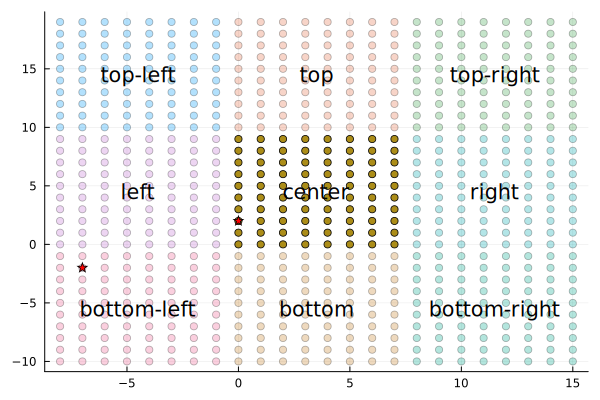

In [11]:
P1_co = find_co(coordinates_p1, p1)
P2_co = find_co(coordinates_p2, p2)
scatter!([P1_co[1]],[P1_co[2]],color=:red,marker=:star5,markersize=5)
scatter!([P2_co[1]],[P2_co[2]],color=:red,marker=:star5,markersize=5)